<div style="text-align:center; cursor: auto;">
    <a href="https://www.credly.com/badges/5277e6b4-acf1-4f18-b83f-05d1d2ef3059/public_url" target="_blank">
        <img 
            src="applied-data-science-capstone.png" 
            width="150" 
            alt="IBM Applied Data Science Badge" 
            style="object-fit: cover; border-radius: 50%;">
    </a>
</div>

**<center><h2>EDA via Data Visualization</h2></center>**

## Exploring and Preparing Data


In this project, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage.

Falcon 9 first stage will land successfully


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planned. Space X performs a controlled landing in the oceans.


## Objectives

Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering


### Import Libraries and Define Auxiliary Functions


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis

First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [ ]:
file_path = "spacex_dataset_clean.csv"
df = pd.read_csv(file_path)
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


Now, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.


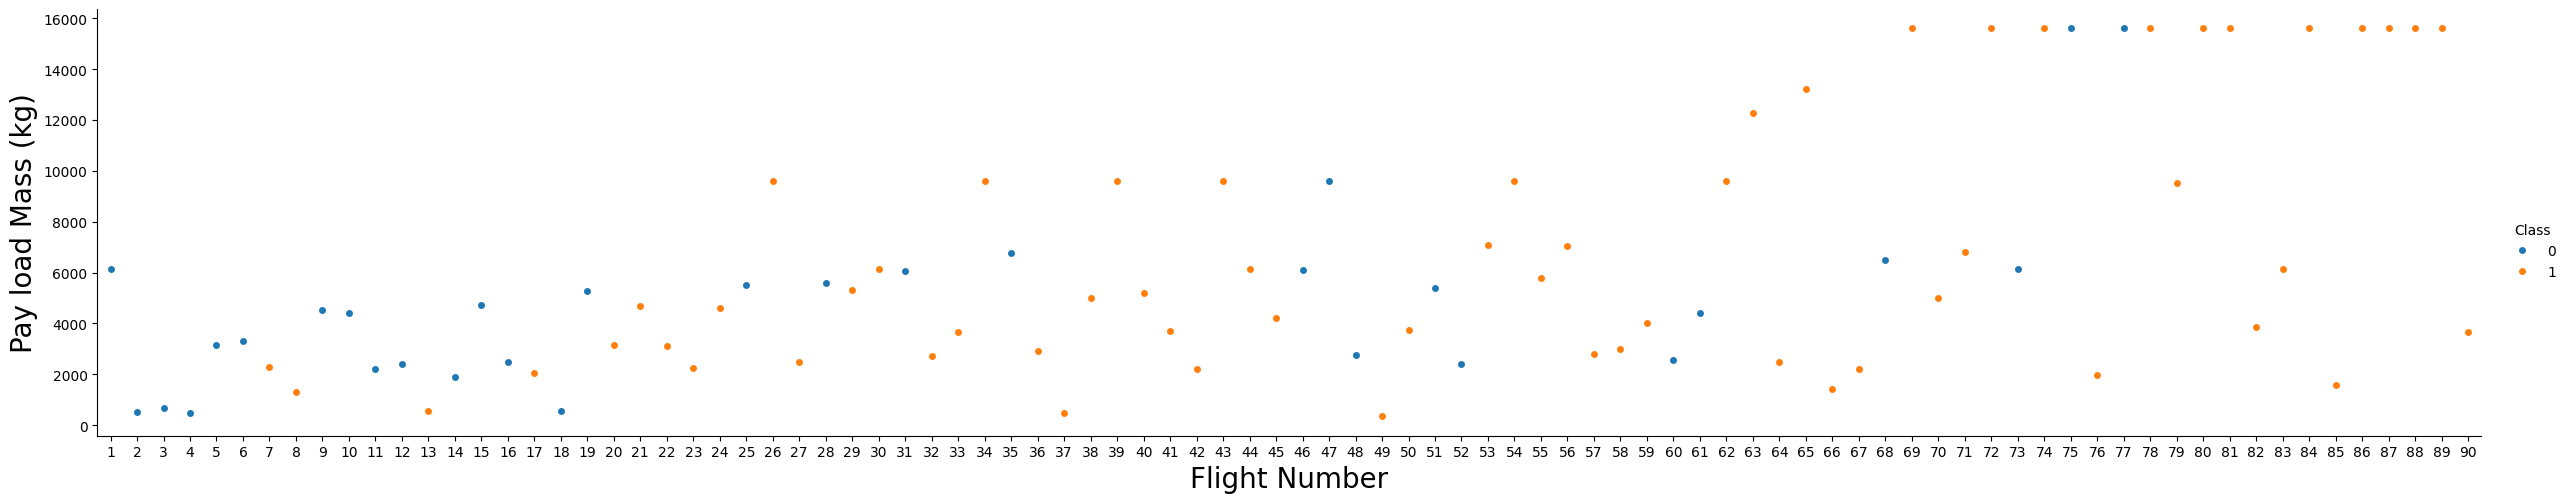

In [3]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

We see that different launch sites have different success rates.  <code>CCAFS LC-40</code>, has a success rate of 60 %, while  <code>KSC LC-39A</code> and <code>VAFB SLC 4E</code> has a success rate of 77%.


Next, let's drill down to each site visualize its detailed launch records.


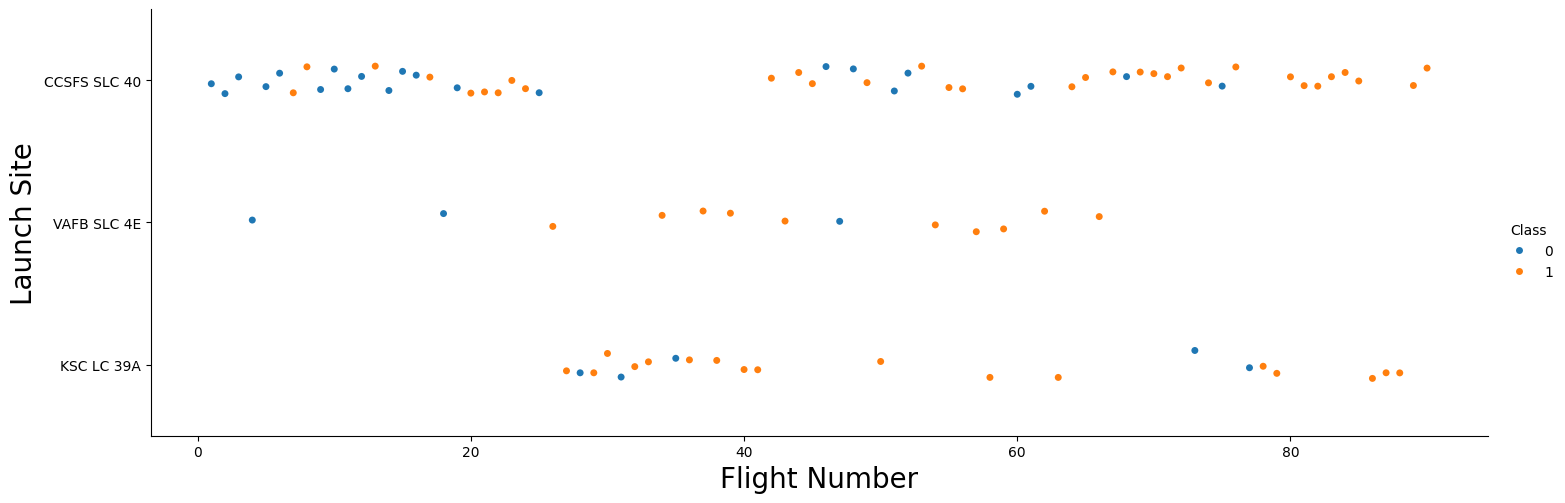

In [4]:
# Visualizes the relationship between Flight Number and Launch Site
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect = 3)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

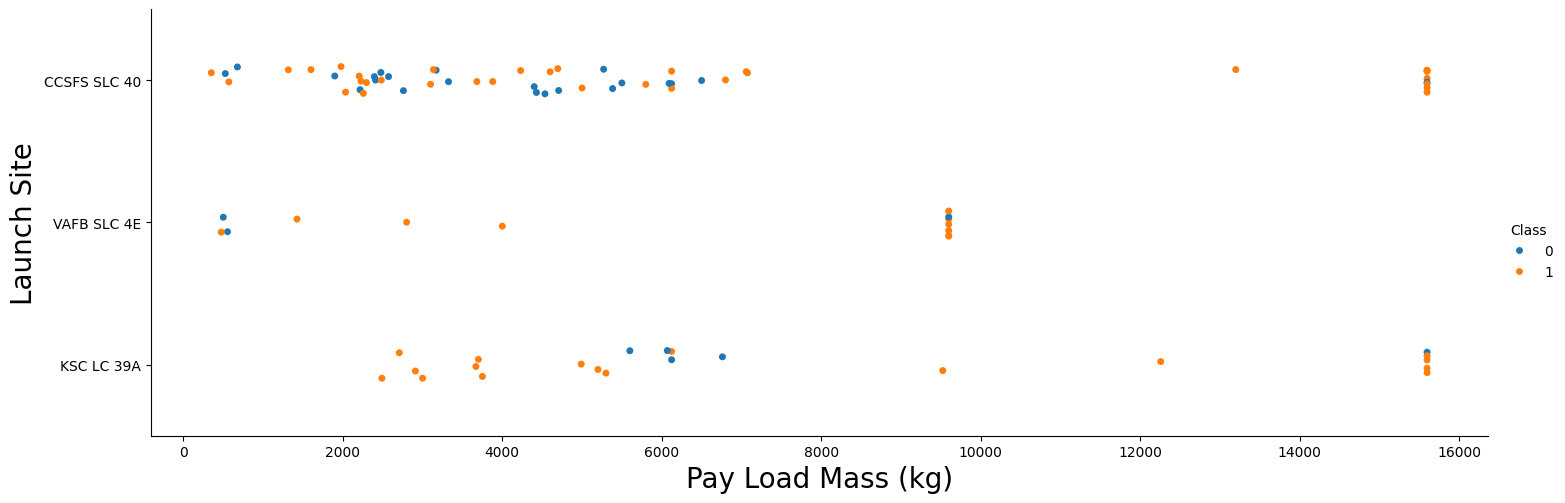

In [5]:
# Visualizes the relationship between Payload and Launch Site
sns.catplot(y="LaunchSite", x="PayloadMass", hue="Class", data=df, aspect = 3)
plt.xlabel("Pay Load Mass (kg)",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

Now if you observe the Payload Vs. Launch Site scatter point chart you will find for the VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).


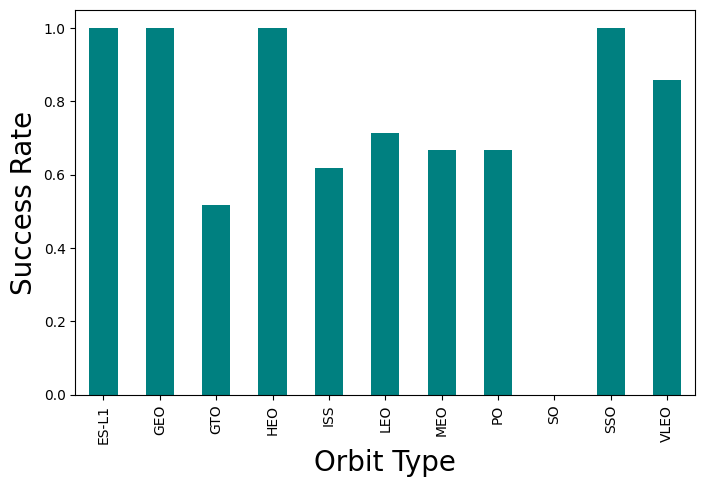

In [6]:
# Visualizes the relationship between success rate of each orbit type
orbit_success = df.groupby('Orbit')['Class'].mean()

plt.figure(figsize=(8,5))
orbit_success.plot(kind='bar', color='teal')
plt.xlabel('Orbit Type',fontsize=20)
plt.ylabel('Success Rate',fontsize=20)
plt.show()

The MOST SUCCESSFUL orbit types are: ES-L1, GEO, HEO, SSO and VLEO


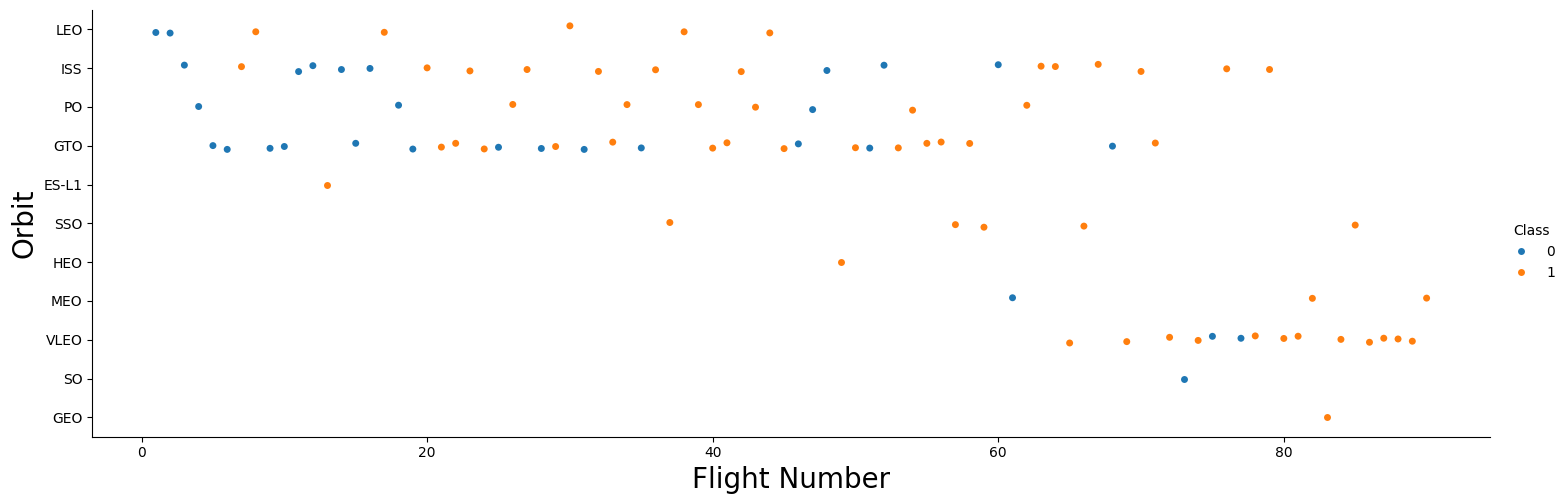

In [7]:
# Visualizes the relationship between FlightNumber and Orbit type
sns.catplot(y="Orbit", x="FlightNumber", hue="Class", data=df, aspect = 3)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


We can observe that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.


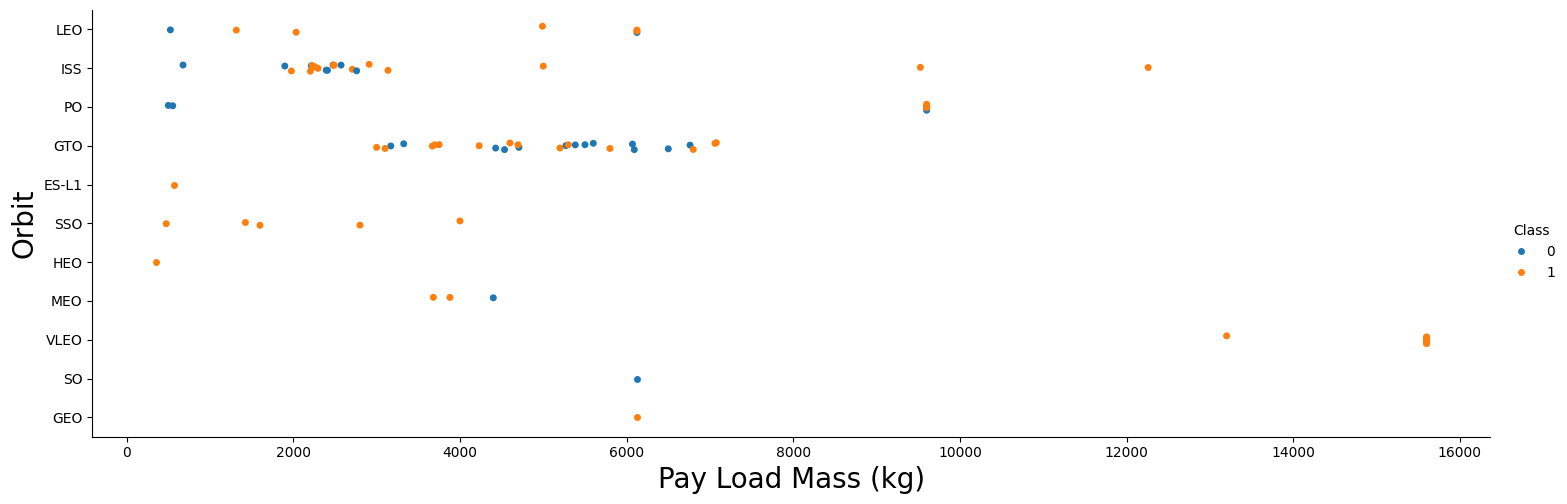

In [8]:
# Visualizes the relationship between Payload and Orbit type
sns.catplot(y="Orbit", x="PayloadMass", hue="Class", data=df, aspect = 3)
plt.xlabel("Pay Load Mass (kg)",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type.

With heavy payloads, the positive (successful) landing rate leans more for Polar, LEO and ISS. However, we cannot distinguish this well enough for the GTO orbit type.



Let's plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend but, first, we need a function to get the year from the date:



In [9]:
df['Year'] = df["Date"].apply(lambda x: x.split("-")[0])

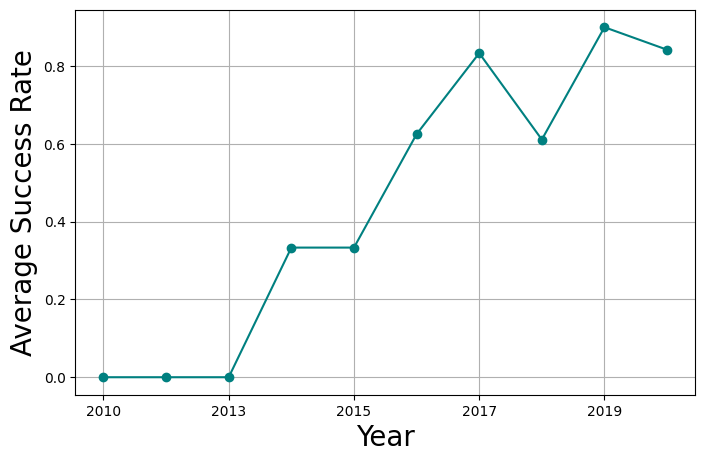

In [10]:
# Line chart showing the launch success yearly trend
yearly_success_rate = df.groupby('Year')['Class'].mean()

plt.figure(figsize=(8,5))
yearly_success_rate.plot(kind='line', color='teal', marker='o')
plt.xlabel('Year',fontsize=20)
plt.ylabel('Average Success Rate',fontsize=20)
plt.grid(True)
plt.show()

The sucess rate since 2013 kept increasing until 2020


## Features Engineering

We need to obtain some preliminary insights about how each important variable would affect the success rate


In [11]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6123.547647,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


#### Let's OneHotEncode (convert categorical variables into a format that can be provided to machine learning algorithms to improve predictions) to the 'Orbits', 'LaunchSite' 'LandingPad', and 'Serial' columns.


In [12]:
# OneHotEncoded dummy variables on categorical columns
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6123.547647,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


Now that our <code>features_one_hot</code> dataframe only contains numbers, we can cast the entire dataframe to a variable type <code>float64</code>


In [13]:
features_one_hot = features_one_hot.astype('float64')
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6123.547647,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We can now export it to a <b>CSV</b> for the next section:

In [14]:
features_one_hot.to_csv('spacex_dataset_features.csv', index=False)